**Homework: Direct Solvers**     

This assignment includes work by hand and coding. Some problems are from the textbook.

**You do not need to write your own solver for the textbook problems. You might wish to use a NumPy solver.**

For some of these problems, you will need to create large arrays and/or time your functions. Here is code that shows how you can create large arrays quickly (the A times transpose(A) is to make sure I get a matrix that is not singular):

```
import numpy as np
n = 500
np.random.seed( 36 )
A = np.random.random( (n,n)).round(3)
A = A @ A.T
b = np.random.random( n).round(3)
```


And here is an example of getting execution time:
```
import time
t0 = time.time()
b = gaussElimin(A,b)
t1 = time.time()
exec_time = t1-t0
```

Rather than printing large arrays to check manually, you might prefer using `np.allclose(a, b, rtol, atol)` ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.allclose.html)), which takes in two arrays `a` and `b` and checks each element in `a` with its counterpart in `b` to see if they obey this equation: $|a_i-b_i| \leq atol + rtol\times|b_i|$.

Be sure to Google these functions so you understand what they are doing.

**Hand calculation for small arrays**

**H1)** Gaussian elimination: p. 55, Problem 4

**H2)** Cholesky decomposition: p. 56, Problem 11

In [38]:
# Provided code
# H1    Reference solution
import numpy as np

A = np.array([[2,-3,-1],[3,2,-5],[2,4,-1]])
b = np.array([[3],[-9],[-5]])

sol = np.linalg.solve(A,b)
print(sol)

[[ 0.6531]
 [-1.1429]
 [ 1.7347]]


In [39]:
# Provided code
# H2   Reference solution
A = np.array([[1,1,1],[1,2,2],[1,2,3]])
b = np.array([[1],[3/2],[3]])

L = np.linalg.cholesky(A)
print('L =\n', L)

y = np.linalg.solve(L,b)
print('y = \n',y)

x = np.linalg.solve(L.T,y)
print('x = \n', x)

L =
 [[1. 0. 0.]
 [1. 1. 0.]
 [1. 1. 1.]]
y = 
 [[1. ]
 [0.5]
 [1.5]]
x = 
 [[ 0.5]
 [-1. ]
 [ 1.5]]


**C1) Write a Python function that will invert a matrix of arbitrary dimensions.**

*  Use the technique described in class that solves a series of problems using Gaussian elimination to obtain the matrix inverse.
*  Demonstrate your function by inverting the provided 6x6 matrix.
*  Show that $A$ times inverse($A$) is a diagonal matrix.

Note: To be efficient, you could modify the Gaussian elimination function to handle multiple righthand sides, but that is not required for this assignment. You can use the code on p. 41 or a function in NumPy to solve the equations.

In [40]:
# P5
import numpy as np
np.set_printoptions(precision=4) 

def gaussElimin_colon(a,b):
    newA = a.copy()
    n = len(b)
    # Elimination Phase
    for k in range(0,n-1):
        for i in range(k+1,n):
            if newA[i,k] != 0.0:
                lam = newA[i,k] / newA[k,k]
                newA[i,k+1:n] = newA[i,k+1:n] - lam * newA[k,k+1:n] #replace
                b[i] = b[i] - lam*b[k]

    # Back substitution
    for k in range(n-1,-1,-1):
        b[k] = (b[k] - np.dot(newA[k,k+1:n], b[k+1:n])) / newA[k,k]

    return b

def invertMatrix(A):
    newA = A.copy()
    inverted_matrix = A.copy()
    identity_matrix = np.zeros_like(newA)
    length = np.shape(identity_matrix)[0]

    #creation of identity matrix
    for i in range(length):
       for j in range(length):
          identity_matrix[i, i] = 1
          
    #performs the gaussian elimination with each column of the identity matrix
    for i in range(length):
        identity_column = identity_matrix[i, :]
        row = A[:, i]
        solutions = gaussElimin_colon(newA, identity_column) 
        inverted_matrix[i] = solutions

    #easier to transpose after than to write in as a column
    inverted_matrix = np.transpose(inverted_matrix)
    
    return inverted_matrix

In [41]:
# Provided matrix A to test your function
n = 6; np.random.seed(36)
A = 10*np.random.random((n,n)).round(3)
print('A =\n', A)

print(f"Inverted = \n{invertMatrix(A)}")
diagonal_matrix = np.matmul(A, invertMatrix(A))
print(f"Diagonal = \n{diagonal_matrix}")

A =
 [[7.29 6.02 9.52 1.43 8.07 3.63]
 [1.87 2.59 6.3  0.33 9.47 9.04]
 [5.5  1.97 2.32 0.02 2.26 3.75]
 [4.53 2.46 4.6  2.1  6.71 4.52]
 [5.93 3.27 2.24 2.16 1.72 0.23]
 [6.29 5.31 2.43 5.25 1.74 3.42]]
Inverted = 
[[-0.0249 -0.1318  0.1854  0.1682 -0.0062 -0.0503]
 [-0.1674  0.6951 -0.3818 -0.9198  1.1525 -0.1029]
 [ 0.4171 -0.5909  0.3016  0.4837 -1.221   0.2312]
 [ 0.0788 -0.376  -0.0016  0.5391 -0.6463  0.2429]
 [-0.2393  0.3789 -0.3322 -0.1405  0.8611 -0.2555]
 [ 0.0102 -0.0326  0.2089  0.0191 -0.3565  0.1375]]
Diagonal = 
[[ 1.0000e+00 -9.1583e-17  5.5730e-17 -2.9378e-17 -1.8629e-17  9.1652e-17]
 [-3.7038e-16  1.0000e+00 -1.8231e-16 -6.2264e-17 -3.3815e-16 -2.4383e-16]
 [ 5.1738e-16 -3.6429e-16  1.0000e+00  5.2042e-17 -6.3838e-16  7.9797e-16]
 [ 3.4217e-16 -2.2880e-16  6.8600e-16  1.0000e+00 -8.3521e-16  5.4422e-16]
 [-5.2150e-16  7.9023e-16 -1.1830e-15 -8.0518e-16  1.0000e+00 -3.3745e-16]
 [-6.7546e-16  3.0843e-17 -1.3781e-15 -8.5301e-16  3.4930e-15  1.0000e+00]]


**Translating code from the textbook**

In problems C2 and C3, you are encouraged to test and verify your code using small arrays before using it on the 500x500 array, which takes longer to process. Note that you are only changing a very small amount of code. Think it through clearly before starting to type.

**C2)** Starting with the Gaussian elimination code on p. 41, replace the two lines in the code that use colon notation with appropriate loops. To save you time, the code in the textbook is provided below.

Compare the execution times for the original code and your code on the provided 500x500 matrix.

In [42]:
# Provided code to create a 500x500 matrix
n = 500; np.random.seed( 36 )
A = np.random.random((n,n)).round(3); A = A @ A.T
B = np.random.random(n).round(3)

In [43]:
# C2 with colon notation (provided code)
import numpy as np
import time

def gaussElimin_colon(a,b):
    newA = a.copy()
    n = len(b)
    # Elimination Phase
    for k in range(0,n-1):
        for i in range(k+1,n):
            if newA[i,k] != 0.0:
                lam = newA[i,k] / newA[k,k]
                newA[i,k+1:n] = newA[i,k+1:n] - lam * newA[k,k+1:n] #replace
                b[i] = b[i] - lam*b[k]

    # Back substitution
    for k in range(n-1,-1,-1):
        b[k] = (b[k] - np.dot(newA[k,k+1:n], b[k+1:n])) / newA[k,k]

    return b

In [44]:
#C2 with loops instead of colon notation

def gaussElimin_loop(A,b):
    newB = b.copy()
    n = len(b)
    # Elimination Phase
    for k in range(0,n-1):
        for i in range(k+1,n):
            if A[i,k] != 0.0:
                lam = A[i,k] / A[k,k]
                newB[i] = b[i] - lam*b[k]

                #for loop is just iterating through the same range
                for j in range(k+1, n):
                    A[i, j] = A[i, j] - lam * A[k, j]
                
    # Back substitution
    for k in range(n-1, -1, -1):
        product = 0
        for j in range(k+1, n):
            product += A[k,j] * b[j] #product is added along
        newB[k] = (b[k] - product) / A[k,k] #inside k but outside of j

    return b

In [45]:
# Time both methods
import time

#smaller array to test with!!!
# A = np.array([[1,1,1],[1,2,2],[1,2,3]])
# B = np.array([[1],[3/2],[3]])

t0 = time.time()
b1 = gaussElimin_colon(A, B)
print(f"Colon Notation = \n{b1}")
t1 = time.time()
exec_time = t1-t0
print(f"Colon Notation Time: {exec_time}\n")

t2 = time.time()
b2 = gaussElimin_loop(A,B)
print(f"For Loop = \n{b2}")
t3 = time.time()
exec_time_2 = t3-t2

print(f"For Loop Time: {exec_time_2}")

print("Are they the same? ")
print(True if b1.all() == b2.all() else False) #np.allclose was giving me trouble

print(f"It is signficantly slower to perform for loops.")

Colon Notation = 
[ 9.4332e+01 -1.4557e+02 -1.7096e+02  4.3383e+01 -2.1102e+02  1.1912e+02
 -2.5621e+01  2.1207e+01 -1.0139e+02 -9.5763e+01  3.7708e+01  1.8215e+02
 -1.3973e+01  6.5029e+01 -5.5878e+01 -4.0722e+01 -4.9750e+01 -1.7046e+02
  1.0058e+02 -5.7529e+01 -9.5356e+01  7.5305e+01  1.0277e+02  5.9068e+01
  3.8677e+01 -1.1381e+01 -2.0385e+01 -2.1685e+02  5.9696e+01 -1.1927e+02
  6.5929e+01  1.8062e+02  5.0681e+00  4.2159e+01 -7.9096e+01  2.2269e+02
  1.2775e+01 -3.8666e+01 -1.6478e+02  6.9079e+01 -9.6719e+00  8.5496e+01
  2.1292e+02 -8.1119e+00 -2.6661e+02  2.0372e+02  1.8828e+01  5.7072e+01
  2.2214e+01  3.3528e+01 -4.7019e+01  7.6305e+01 -1.0141e+02  5.9909e+01
  6.9039e+01  1.0307e+02 -1.3866e+02 -3.6939e+01  1.3077e+01  1.3528e+02
 -4.4137e+01  6.6601e+01 -5.8944e+00 -6.7825e+01 -2.4800e+02  1.1709e+01
  1.1358e+02  1.3696e+01 -3.0292e+01  1.2930e+01  2.9476e+02 -1.1404e+02
 -1.5592e+02  1.4909e+02  1.1923e+02  9.7377e+01  3.5713e+01  2.3693e+01
 -1.3216e+01  1.4132e+01  1.0525e

**C3)** Starting with the Cholesky decomposition code on p. 50, replace the three lines in the code that use colon notation with appropriate loops. To save you time, the code in the textbook is provided below.

Compare the execution times for the original code and your code on the provided 500x500 matrix.

In [46]:
# Provided code to create a 500x500 matrix
np.random.seed(123)
N = 500
A = np.random.rand(N,N) * 6
A = np.trunc(A)
A = A.T @ A

In [47]:
# C3 with colon notation (provided code)
import math

def choleski_colon(a):
    n = len(a)
    for k in range(n):
        try:
            a[k,k] = math.sqrt(a[k,k] - np.dot(a[k,0:k], a[k,0:k])) #replace this one
            
        except ValueError:
            print('Error: Matrix is not positive definite')
            return None
        
        for i in range(k+1,n):
            a[i,k] = (a[i,k] - np.dot(a[i,0:k],a[k,0:k]))/a[k,k] #replace this one

    for k in range(1,n): a[0:k,k] = 0.0 #replace this one
    
    return a

In [48]:
#C3 with loops instead of colon notation

def choleski_loop(a):
    n = len(a)
    for k in range(n):
        try:
            product = 0 #again, product outside
            for j in range(0, k):
                product += a[k,j] * a[k,j]
            a[k,k] = math.sqrt(a[k,k] - product) #one replacement
            
        except ValueError:
            print('Error: Matrix is not positive definite')
            # return None
        
        for i in range(k+1,n):
            product = 0
            for j in range(0, k):
                product += a[i,j] * a[k,j]
            a[i,k] = (a[i,k] - product) / a[k,k] #same deal here

    for k in range(1, n): 
        for j in range(0, k):
            a[j,k] = 0.0 #just iterate through the same range

    return a

In [53]:
# Time both methods

n = 500; np.random.seed( 36 )
A = np.random.random((n,n)).round(3); A = A @ A.T
B = np.random.random(n).round(3)

t0 = time.time()
b1 = choleski_colon(A.copy()) #have to copy in the function call
t1 = time.time()
exec_time = t1-t0

print(f"choleski_colon time: {exec_time}\n")
print(f"choleski_colon = \n{b1}")

t2 = time.time()
b2 = choleski_loop(A.copy())
t3 = time.time()
exec_time_2 = t3-t2

print(f"choleski_loop time: {exec_time_2}\n")
print(f"choleski_loop = \n{b2}")

print("Are they the same? ")
print(True if b1.all() == b2.all() else False)

print(f"It is signficantly slower to perform for loops.")

choleski_colon time: 0.3883368968963623

choleski_colon = 
[[12.5442  0.      0.     ...  0.      0.      0.    ]
 [ 9.7871  8.1569  0.     ...  0.      0.      0.    ]
 [ 9.7078  4.0441  7.5119 ...  0.      0.      0.    ]
 ...
 [ 9.9475  4.0644  2.3966 ...  0.2792  0.      0.    ]
 [ 9.5688  3.7089  2.6244 ... -0.0284  0.2088  0.    ]
 [ 9.2548  3.1325  1.9205 ... -0.0274  0.0271  0.1402]]
choleski_loop time: 11.364770412445068

choleski_loop = 
[[12.5442  0.      0.     ...  0.      0.      0.    ]
 [ 9.7871  8.1569  0.     ...  0.      0.      0.    ]
 [ 9.7078  4.0441  7.5119 ...  0.      0.      0.    ]
 ...
 [ 9.9475  4.0644  2.3966 ...  0.2792  0.      0.    ]
 [ 9.5688  3.7089  2.6244 ... -0.0284  0.2088  0.    ]
 [ 9.2548  3.1325  1.9205 ... -0.0274  0.0271  0.1402]]
Are they the same? 
True


**p. 57, Problem 19 (Fourth-degree polynomial)**

In addition to what the problem requires, **plot the data points and the curve fit.** You are also encouraged to check your answer by seeing if the polynomial you find actually has zero curvature at the specified points.

[1, 0, 0, 0, 0]
[1.0, 0.75, 0.5625, 0.421875, 0.31640625]
[1, 1, 1, 1, 1]
[0, 0, 2, 0, 0]
[12, 6, 2, 0, 0]


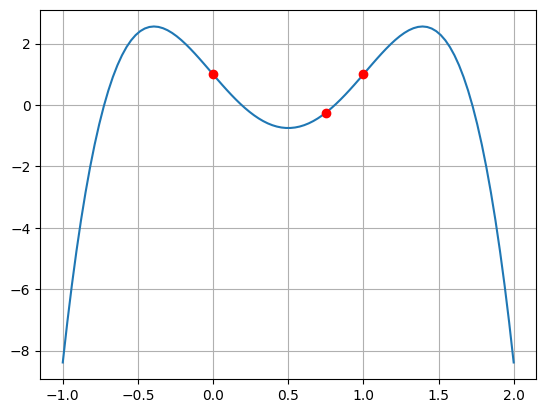

In [55]:
# Code here
from matplotlib import pyplot as plt

def gaussElimin(a,b):
    n = len(b)
    # Elimination Phase
    for k in range(0,n-1):
        for i in range(k+1,n):
            if a[i,k] != 0.0:
                lam = a[i,k]/a[k,k]
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                b[i] = b[i] - lam*b[k]
    # Back substitution
    for k in range(n-1,-1,-1):
        b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    return b

#I used this to help me put vales in the matrix
def f(x):
    row = [x**i for i in range(5)]
    print(row)

def fdp(x):
    row = [12*x**2, 6*x, 2, 0, 0] 
    print(row)   

#the value  after the coefficient in the polynomial for each point
f(0)
f(.75)
f(1)

#when curvature is 0, second derivate is 0, so same
#thing as above but now it's got coefficients in front 
fdp(0)
fdp(1)

x_points = [0, .75, 1]
y_points = [1, -.25, 1]

A = np.array([[1, 0, 0, 0, 0],
              [1, .75, .5625, .421875, .31640625],
              [1, 1, 1, 1, 1],
              [0, 0, 2, 0, 0],
              [0, 0, 2, 6, 12]], dtype = float)

B = np.array([[1],[-.25],[1],[1],[1]], dtype = float)

solutions = gaussElimin(A.copy(), B.copy())

def f1(x):
    return solutions[4, 0]*x**4 + solutions[3, 0]*x**3 + solutions[2, 0]*x**2 + solutions[1, 0]*x**1 + solutions[0, 0] 

xvals = np.linspace(-1, 2, 100)
yvals = [f1(x) for x in xvals]
plt.grid()

plt.plot(xvals, yvals)
plt.plot(x_points, y_points, 'ro')


**p. 79, Problem 12 (Spring-mass system)**

Use $k=1$ and $W=1$ in your calculations.

In [51]:
# Code here

def SpringSystem(k, W):
    k1 = k3 = k4 = 1 * k
    k2 = k5 = 2 * k

    W1 = W3 = 2 * W
    W2 = 1 * W

    A = np.array([
        [(k1 + k2 + k3 + k5), -k3, -k5], 
        [-k3, (k3 + k4), -k4], 
        [-k5, -k4, (k4 + k5)]], dtype = float)
    
    B = np.array([[W1], [W2], [W3]], dtype = float)

    solutions = gaussElimin_colon(A.copy(), B.copy())
    for i in range(len(solutions)):
        print(f"Displacement x{i + 1}: {solutions[i]}")

SpringSystem(1, 1)

Displacement x1: [1.6667]
Displacement x2: [2.6667]
Displacement x3: [2.6667]


**p. 81, Problem 16 (Truss)**

Note that NumPy's trigonometric functions use radians, not degrees.

In [52]:
# Code here
from numpy import cos, sin, pi

def Truss(degrees):
    radians = degrees * (pi / 180)
    c = cos(radians)
    s = sin(radians)

    A = np.array([
        [c, 1, 0, 0, 0], 
        [0, s, 0, 0, 1],
        [0, 0, 2*s, 0, 0],
        [0, -c, c, 1, 0],
        [0, s, s, 0, 0]], dtype = float)

    B = np.array([[0],[0],[1],[0],[0]], dtype = float)

    solutions = gaussElimin_colon(A.copy(), B.copy())

    for i in range(len(solutions)):
        print(f"Force x{i + 1}: {solutions[i]}")

Truss(53)


Force x1: [1.0403]
Force x2: [-0.6261]
Force x3: [0.6261]
Force x4: [-0.7536]
Force x5: [0.5]
